<img src="http://www.ceic.org.ar/spanish/img/siisa-logo.jpg" align='right'>

# Identificación de variables y performance  de diferentes proveedores

## Descripción del dataset:
Empiezo con la evaluación del cliente 136 (cuenta) puesto que en el grafo diseniado utiliza los 3 bureau de consulta (nosis, siisa y veraz). La politica seleccionda es la numero 10.
### Dataset cuenta (clientId113)
El data set fue tomado de la base de datos para el número de cliente 136 y la politica 10. El dataset completo consta de ~23000 registros para esa politica abarcando las fechas desde el 2017-02-01 al 2019-05-23. 

In [1]:
# importo las librerias que voy a utilizar.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Importo el dataset que se discute en la seccion de "descripcion del dataset"
df = pd.read_csv("Client_113_Policy_10_20170201_20190523.cvs", low_memory=False)

In [3]:
# evalúo el tamanio del dataset.
df.shape

(23791, 244)

In [4]:
df.head(3)

,executionId,executionDate,executionDateTime,policyId,policyVersion,decisionResult,canal,ingreso,nombreApellido,nroDoc,...,veraz_observacionesConqui60m,veraz_observacionesMontoCerrada1m,veraz_observacionesMontoCerrada24m,veraz_peorSituacionBureau4m,veraz_peorSituacionBureau5a12m,veraz_peorStatus12,veraz_peorStatusActual,veraz_poblacion,veraz_score,veraz_validado
0,117133,02/08/2017,17:12,10,0,Documento en base de denegados,NaN,NaN,PENINO RAMON ADOLFO,1997989.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,117134,02/08/2017,17:13,10,0,Documento en base de denegados,NaN,NaN,PENINO RAMON ADOLFO,1997989.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,117136,02/08/2017,17:19,10,0,"OK|Pasa Cuit valido, edad valida, sin juicios ...",NaN,NaN,RAMOS CARLOS HERNAN,20000250.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Me pregunto si todos los registros tienen toda la misma politica a fin de hacer debug sobre la consulta sql.
df.policyId.unique()

array([10], dtype=int64)

In [6]:
# Creo una columna que solo me diga si rechazo o califica spliteado el campo de decisionResult.
# Los strings son APROBADO o RECHAZAR un cliente en este caso serian OK, ERROR respectivamente.
df['decision_filtered'] = df.decisionResult.str.split("|", n = 1, expand = True)[0]

OK                                   18075
ERROR                                 5281
ADVERTENCIA                            244
Rechaza: Posee Sit. Irregulares.        83
Rechaza: posee Sit. Irregular.          20
"Error nosis no valida identidad"        5
Documento en base de denegados           3
Error consultando Nosis empleador        2
Name: decision_filtered, dtype: int64

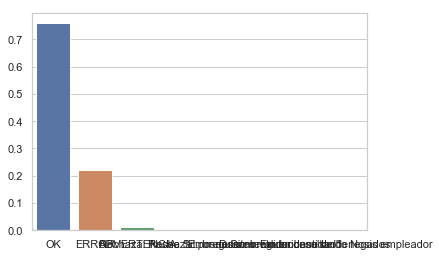

In [7]:
# Simplemente realizo un barplot para ver la distribucion de status de credito.
sns.set(style="whitegrid")
ax =sns.barplot(df.decision_filtered.value_counts().index, df.decision_filtered.value_counts().values/len(df.decision_filtered))
df.decision_filtered.value_counts()
# En este caso parece que error es sinonimo de no aprueba.

In [8]:
# Me quedo con todas las instancias donde siisa veraz y nosis fueron evaluadas.
df=df[~((df.veraz_score.isna()) & (df.siisa_score.isna()) & (df.nosis_score.isna()))]

In [9]:
# No me interesa las instancias donde tengo ERROR o ESCALAMIENTO
df = df.drop(df[df.decision_filtered=='ADVERTENCIA'].index)
df = df.drop(df[df.decision_filtered=='Rechaza: Posee Sit. Irregulares.'].index)
df = df.drop(df[df.decision_filtered=='"Error nosis no valida identidad"'].index)
df = df.drop(df[df.decision_filtered=='Documento en base de denegados'].index)
df = df.drop(df[df.decision_filtered=='Error consultando Nosis empleador'].index)
df = df.drop(df[df.decision_filtered=='Rechaza: posee Sit. Irregular.'].index)

OK       18075
ERROR     5281
Name: decision_filtered, dtype: int64

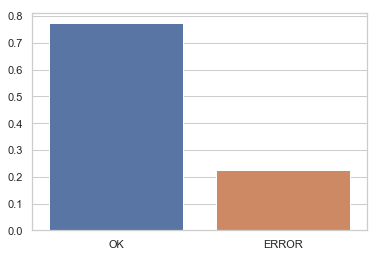

In [10]:
# Simplemente grafico la cantidad que pasa por califica o rechazo.
sns.set(style="whitegrid")
ax =sns.barplot(df.decision_filtered.value_counts().index, df.decision_filtered.value_counts().values/len(df.decision_filtered))
df.decision_filtered.value_counts()
# En este caso parece que error es sinonimo de no aprueba.

In [11]:
# Al final me tengo 23364 regristros que puedo evaluar.
df.shape

(23364, 245)

In [12]:
df.head(3)

,executionId,executionDate,executionDateTime,policyId,policyVersion,decisionResult,canal,ingreso,nombreApellido,nroDoc,...,veraz_observacionesMontoCerrada1m,veraz_observacionesMontoCerrada24m,veraz_peorSituacionBureau4m,veraz_peorSituacionBureau5a12m,veraz_peorStatus12,veraz_peorStatusActual,veraz_poblacion,veraz_score,veraz_validado,decision_filtered
2,117136,02/08/2017,17:19,10,0,"OK|Pasa Cuit valido, edad valida, sin juicios ...",NaN,NaN,RAMOS CARLOS HERNAN,20000250.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OK
3,117137,02/08/2017,17:20,10,0,"OK|Pasa Cuit valido, edad valida, sin juicios ...",NaN,NaN,RAMOS CARLOS HERNAN,20000250.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OK
4,117140,02/08/2017,17:24,10,0,"OK|Pasa Cuit valido, edad valida, sin juicios ...",NaN,NaN,PETERSEN GUILLERMO FEDERICO,32201724.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OK


## Correlación entre variables.
La idea de este apartado es poder generar algun mētodo a fin de evaluar la equivalencia de variables para los tres proveedores evaluados. Por ende simplemente me quedo con un subset de variables de los tres proveedores.

In [13]:
# Genero un dataframe  de un subset de columnas (variables de salida de los bureau's). 
df_variables_select = df.filter(regex=r'(siisa*|veraz*|nosis*)')
df_variables_select.shape

(23364, 221)

In [14]:
df_variables_select.head(3)

,nosis_24mBCRAcant1,nosis_24mBCRAcantMora,nosis_24mBCRAmaxSit,nosis_24mBCRAmonto1,nosis_24mBCRAmontoMora,nosis_6mBCRAcant1,nosis_6mBCRAcantMora,nosis_6mBCRAmaxSit,nosis_6mBCRAmonto1,nosis_6mBCRAmontoMora,...,veraz_observacionesConqui60m,veraz_observacionesMontoCerrada1m,veraz_observacionesMontoCerrada24m,veraz_peorSituacionBureau4m,veraz_peorSituacionBureau5a12m,veraz_peorStatus12,veraz_peorStatusActual,veraz_poblacion,veraz_score,veraz_validado
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# solo chequeo el tipo de variable.
for column in df_variables_select.columns:
    print(df_variables_select[column].dtype,column)

float64 nosis_24mBCRAcant1
float64 nosis_24mBCRAcantMora
float64 nosis_24mBCRAmaxSit
float64 nosis_24mBCRAmonto1
float64 nosis_24mBCRAmontoMora
float64 nosis_6mBCRAcant1
float64 nosis_6mBCRAcantMora
float64 nosis_6mBCRAmaxSit
float64 nosis_6mBCRAmonto1
float64 nosis_6mBCRAmontoMora
float64 nosis_abonadosCant12
float64 nosis_abonadosCant24
float64 nosis_abonadosCant6
object nosis_abonadosMonto12
object nosis_abonadosMonto24
object nosis_abonadosMonto6
float64 nosis_actividad
float64 nosis_actividadFecha
float64 nosis_AfipFech
float64 nosis_aportesEmpleadoCantPeriodos
float64 nosis_aportesEmpleadoMaxPeriodo
float64 nosis_aportesEmpleadorCantPeriodos
float64 nosis_aportesEmpleadorMaxPeriodo
object nosis_autonomoCat
float64 nosis_balanceActivoCte
float64 nosis_balanceActivoNoCte
float64 nosis_balanceEjercicio
float64 nosis_balanceFecha
float64 nosis_balancePasivoCte
float64 nosis_balancePasivoNoCte
float64 nosis_balancePatrimonioNeto
float64 nosis_balanceVentas
float64 nosis_BCRAcant1
floa

In [16]:
borrar=df_variables_select.nosis_abonadosMonto12[~(df_variables_select.nosis_abonadosMonto12.isna())]

### Variables no categoricas.
Primero evaluo las variables del tipo no categoricas de modo tal de ver si existe alguna correlacion entre las mismas, simplemente calculando el coeficiente de variacion.

In [17]:
# Descarto todas las variables categoricas.
df_variables_cuant=df_variables_select.drop(df_variables_select.select_dtypes(['object','bool']), axis=1)

In [18]:
# Calculo la correlacion de todas las variables.
corr=df_variables_cuant.corr()

In [19]:
# procedimiento para separa la matriz cuadrada de correlaciones de modo de mejorar la visualizacion.
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]



In [20]:
# Imprimo las variables mas correlacionadas tomando un valor de corte igual a 0.6.

a=get_top_abs_correlations(df_variables_cuant, 10000)
# Elimino quedas aquellas que sean NAn.
a=a.dropna()
# cutoff de correlacion.
a_filter=a[abs(a.values) > 0.6]
# Guardo un archivo de correlacion.
a_filter.to_csv('corr_cliente 113-Politica10.csv', header=True)
rf=pd.read_csv('corr_cliente 113-Politica10.csv')
rf.columns = ['proveedor_1','proveedor_2', 'corr_value']
rf=rf[((rf.proveedor_1.str.contains('siisa', regex=True) & rf.proveedor_2.str.contains('veraz', regex=True)) | (rf.proveedor_1.str.contains('veraz', regex=True) & rf.proveedor_2.str.contains('siisa', regex=True)) | (rf.proveedor_1.str.contains('siisa', regex=True) & rf.proveedor_2.str.contains('nosis', regex=True)) | (rf.proveedor_1.str.contains('nosis', regex=True) & rf.proveedor_2.str.contains('siisa', regex=True)) | (rf.proveedor_1.str.contains('nosis', regex=True) & rf.proveedor_2.str.contains('veraz', regex=True)) | (rf.proveedor_1.str.contains('veraz', regex=True) & rf.proveedor_2.str.contains('nosis', regex=True)))]
rf.to_csv('corr_cliente 113-Politica10_fix.csv', header=True)
print("Top Absolute Correlations")
rf

Top Absolute Correlations


,proveedor_1,proveedor_2,corr_value
7,siisa_cuitsCheques,veraz_consumoPreMora,0.955617
18,nosis_BCRAmonto4,siisa_monto4s,0.850852
20,nosis_BCRAmonto5,siisa_monto5s,0.844726
21,nosis_BCRAcant4,siisa_cant4s,0.844332
25,nosis_BCRAcant5,siisa_cant5s,0.798678
26,nosis_BCRAcantMora,siisa_cantMorasBCRA,0.779833
27,nosis_BCRAcant3,siisa_cant3s,0.778878
29,nosis_6mBCRAmaxSit,veraz_peorStatusActual,0.773132
36,nosis_BCRAmonto3,siisa_monto3s,0.721004
37,nosis_BCRAmontoMora,siisa_montoMorasBCRA,0.717446


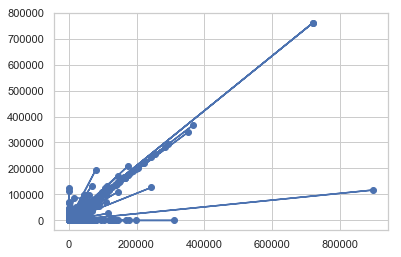

In [21]:
mirar= df_variables_cuant[['nosis_BCRAmonto4','siisa_monto4s']]
mirar=mirar.dropna()
plt.plot(mirar.nosis_BCRAmonto4,mirar.siisa_monto4s,'-o')

### Variables categoricas
Para este apartado a fin de evaluar la relacion entre variables categoricas utilizo el [coeficiente](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9) de incerteza basado 
en la entropia condicional. Las herramientas las podemos descargar de este [repo](https://github.com/shakedzy/dython).



In [22]:
from dython.nominal import associations, conditional_entropy, theils_u

In [23]:
# Descarto todas las variables categoricas.
# tengo que seguir con esto luego.
#df_variables_cat=df.drop(df_variables_select.select_dtypes(['float64']), axis=1)

In [24]:
#df_variables_cat.info()

## Scores 
El propósito de los gráficos a continuación es evaluar el desempenio de cada score y compararlos entre si modo tal de ver alguna tendencia.




In [25]:
# Evalúo que existan todos los pares xy para evaluar scores.
df_scores=df[['siisa_score','veraz_score','nosis_score']]

In [37]:
# Me saco de encima los registros donde no se evaluan todos los scores.
df_scores=df_scores.dropna()
print(df_scores.shape)
df_scores=df_scores[df_scores>1]
print(df_scores.shape)

(10227, 3)
(10227, 3)



###  Siisa vs Nosis:

In [38]:
# calculo arrays de quatiles para cada bureau donde barro el rango [0-1 de quantiles]
nosis_q = [df_scores.nosis_score.quantile(i/10) for i in range(10)]
siisa_q = [df_scores.siisa_score.quantile(i/10) for i in range(10)]
veraz_q = [df_scores.veraz_score.quantile(i/10) for i in range(10)]

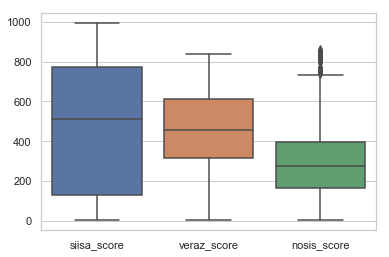

In [39]:
sns.boxplot(data=df_scores)

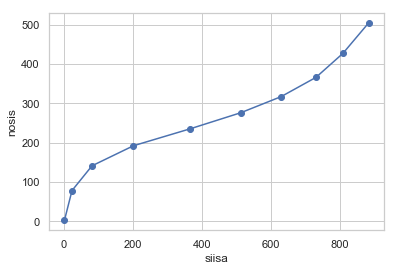

In [40]:
# Ploteo la primer comparacion (Siisa vs Nosis).
plt.plot(siisa_q, nosis_q, '-o')
plt.xlabel('siisa')
plt.ylabel('nosis')
plt.show()

### Siisa vs Veraz

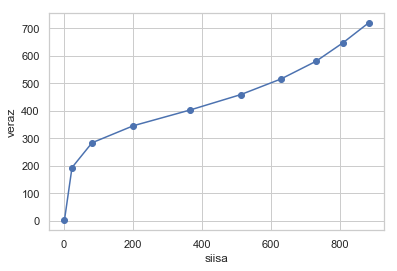

In [41]:
# Ploteo la segunda comparacion (Siisa vs Veraz).
plt.plot(siisa_q, veraz_q, '-o')
plt.xlabel('siisa')
plt.ylabel('veraz')
plt.show()

### Nosis vs Veraz


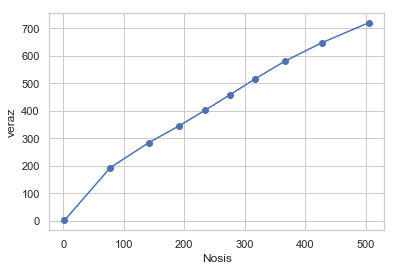

In [42]:
# Ploteo la tercer comparacion (Nosis vs Veraz).
plt.plot(nosis_q, veraz_q, '-o')
plt.xlabel('Nosis')
plt.ylabel('veraz')
plt.show()

## Correspondencia en la clasificación.

Con el objetivo de ver como clasifican  ambos scores a una población en particular se calculó un percentil de una población para un dado score y se evaluó como cayó en el segundo ranking. 

In [43]:
# Calculo a pertencencia de percentiles intra-score.

from scipy import stats
rank_array_nosis=stats.rankdata(df_scores.nosis_score.to_numpy(), "average")/len(df_scores.nosis_score.to_numpy())
rank_array_siisa=stats.rankdata(df_scores.siisa_score.to_numpy(), "average")/len(df_scores.siisa_score.to_numpy())
rank_array_veraz=stats.rankdata(df_scores.veraz_score.to_numpy(), "average")/len(df_scores.veraz_score.to_numpy())

# solo divido en tres clases. Malos, regulares y buenos.
bins= [0, 0.33, 0.66, 1.0]
#bins= [0, 0.5, 1.0]
nosis_score= pd.cut(rank_array_nosis,bins)
siisa_score= pd.cut(rank_array_siisa,bins)
veraz_score= pd.cut(rank_array_veraz,bins)

print(pd.value_counts(nosis_score))
print(pd.value_counts(siisa_score))
print(pd.value_counts(veraz_score))


(0.66, 1.0]     3469
(0.33, 0.66]    3388
(0.0, 0.33]     3370
dtype: int64
(0.66, 1.0]     3479
(0.33, 0.66]    3378
(0.0, 0.33]     3370
dtype: int64
(0.66, 1.0]     3484
(0.0, 0.33]     3376
(0.33, 0.66]    3367
dtype: int64


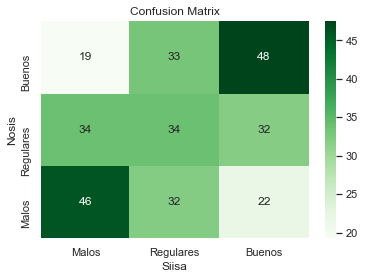

In [53]:
from sklearn.metrics import confusion_matrix
from itertools import *

cm = confusion_matrix(siisa_score.codes,nosis_score.codes)
# Normalization
cm = cm.astype('float')*100.00 / cm.sum(axis=1)[:, np.newaxis]
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap="Greens"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Siisa');ax.set_ylabel('Nosis'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Malos', 'Regulares' , 'Buenos']); ax.yaxis.set_ticklabels(['Malos', 'Regulares' , 'Buenos']);
ax.invert_yaxis()


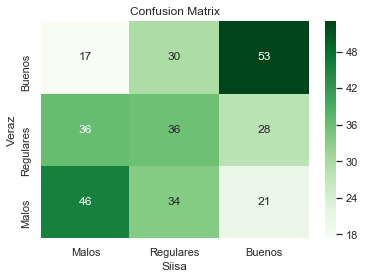

In [52]:
np.set_printoptions(precision=2)
cm = confusion_matrix(siisa_score.codes,veraz_score.codes)
# Normalizacion step.
cm = cm.astype('float')*100.00 / cm.sum(axis=1)[:, np.newaxis]
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,cmap="Greens"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Siisa');ax.set_ylabel('Veraz'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Malos', 'Regulares' , 'Buenos']); ax.yaxis.set_ticklabels(['Malos', 'Regulares' , 'Buenos']);
ax.invert_yaxis()

In [35]:
dist=df.siisa_scorePoblacion.dropna()

In [36]:
dist.value_counts()

H    21981
T      651
Name: siisa_scorePoblacion, dtype: int64